# clean-up for mock dataset 

For use in the visualiser app for supernova.ai

In [ ]:
import os
import pandas as pd

df = pd.read_csv('c:/Users/johan/Documents/GitHub/sandbox/_Jupyter/data/supernova_scrape.csv', encoding='ISO-8859-1')
df = df.drop(columns='Column1')
# df

In [779]:
df.isnull().sum()

name                   1
label                  1
value                712
reporting_period    1841
dtype: int64

In [780]:
df = df.dropna()
df = df.copy()
df['reporting_period'] = df['reporting_period'].astype(int)
df['name'] = df['name'].astype('string')
df['label'] = df['label'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42382 entries, 0 to 44932
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              42382 non-null  string
 1   label             42382 non-null  string
 2   value             42382 non-null  object
 3   reporting_period  42382 non-null  int32 
dtypes: int32(1), object(1), string(2)
memory usage: 1.5+ MB


In [781]:
df.value.sample(10)

17095     254
7754       No
6612     True
34880     3°C
26068      No
2040       No
1340     True
31189     3°C
34781    True
37466    True
Name: value, dtype: object

In [782]:
# Inspect the row with value '118,10032'
df[df['value'] == '118,10032']

,name,label,value,reporting_period
0,Microsoft Corporation,emissions_scope_1,"118,10032",2020


In [783]:
# to remove the bastard, use the tilde. Same key as the #, but with shift
df = df[~(df['value'] == '118,10032')]

In [784]:
# gone
df[df['value'] == '118,10032']

,name,label,value,reporting_period


In [785]:
# Define a function to check if a value can be converted to a float
def is_float(value):
    try:
        float(value.replace(',', ''))
        return True
    except ValueError:
        return False

# Apply the function to the 'value' column to create a boolean mask
mask = df['value'].apply(is_float)

# Create a new column 'non_numeric_value' for non-numeric values
df['categorical'] = df.loc[~mask, 'value']

# Convert numeric values in the 'value' column to float
df.loc[mask, 'value'] = df.loc[mask, 'value'].str.replace(',', '').astype(float)

# Convert remaining non-numeric values in the 'value' column to NaN
df.loc[~mask, 'value'] = None


In [786]:
df.value = df.value.astype(float)
df.value.dtype

dtype('float64')

In [787]:
df.sample(10)

,name,label,value,reporting_period,categorical
16171,"Advance Auto Parts, Inc.",pesticides,NaN,2022,No
4672,Ball Corporation,controversialWeapons,NaN,2022,No
16753,"Motorola Solutions, Inc.",Employees,18700.00,2021,NaN
4814,Biogen Inc.,"Ready for publishing (scope 1,2)",NaN,2021,True
32159,"Sabra Health Care REIT, Inc.",Arabesque_GC_score,37.30,2021,NaN
25226,"Mohawk Industries, Inc.",alcoholic,NaN,2022,No
13420,"Foot Locker, Inc.",Arabesque_ESG_score,54.14,2021,NaN
191,UnitedHealth Group Incorporated,coal,NaN,2022,No
20277,Arthur J. Gallagher & Co.,catholic,NaN,2022,No
11777,Coca-Cola Bottlers Japan Holdings Inc.,Arabesque_ESG_score,50.62,2021,NaN


In [788]:
# to make a shorter list with only the companies with lots of data
df['name'].value_counts()

name
Biogen Inc.                                     137
Illumina, Inc.                                  137
Ball Corporation                                133
Johnson Controls International plc              118
Autodesk, Inc.                                  113
                                               ... 
Anglo American Platinum Limited                   1
Powszechna Kasa Oszczednosci Bank Polski          1
The Shanghai Commercial & Savings Bank, Ltd.      1
Taiwan Mobile Co., Ltd.                           1
Cimarex Energy Co.                                1
Name: count, Length: 3592, dtype: Int64

In [789]:
Biogen = df[df['name'] == 'Biogen Inc.']
Biogen

,name,label,value,reporting_period,categorical
4696,Biogen Inc.,emissions_scope_3,348911.0,2020,NaN
4697,Biogen Inc.,total_energy,444147.0,2020,NaN
4698,Biogen Inc.,emissions_scope_1,57553.0,2020,NaN
4699,Biogen Inc.,emissions_scope_2_location,36953.0,2020,NaN
4700,Biogen Inc.,employee_turnover,9.0,2020,NaN
...,...,...,...,...,...
4829,Biogen Inc.,peerGroup,NaN,2022,Pharmaceuticals
4830,Biogen Inc.,"Does_company_use_products_from_Soy,_Palm_Oil,_...",NaN,2022,False
4831,Biogen Inc.,nasdaq100,NaN,2021,True
4832,Biogen Inc.,emissions_scope_3,406459.0,2021,NaN


In [790]:
# number of unique labels
df['label'].nunique()

125

In [791]:
df['label'].unique()

<StringArray>
[                                                                                                                          'emissions_scope_2_location',
                                                                                                                                     'female_employees',
                                                                                                                                       'carbon_offsets',
                                                                                                                                        'ceo_pay_ratio',
                                                                                                                                     'renewable_energy',
                                                                                                                             'emissions_scope_2_market',
                                                                    

In [792]:
# cat = df['categorical'].unique()

In [793]:
labels_to_keep = ['emissions_scope_2_location', 'female_employees', 
                #   'carbon_offsets',
       'ceo_pay_ratio', 'renewable_energy', 'emissions_scope_2_market',
       'total_energy', 'emissions_scope_3', 'emissions_scope_1',
       'ceo_compensation_total', 'percentage_of_renewable_energy',
       'carbon_footprint', 'water_withdrawal',
    #    'plastic_elimination_actions', 
       'net_zero_goal',
       'net_zero_ milestones', 'net_zero_goal_year', 'Revenue',
       'Employees', 
    #    'Risk:_Sustainalytics',
    #    'UN_GC_Business_ambition_for_1.5c',
    #    'UN_GC_Anti-Corruption_Working_Group', 'UN_GC_CEO_Water_Mandate',
    #    'UN_GC_SBT_(approved)',
    #    'UN_GC_Signatory_to_Women_Empowerment_Principles', 'adult',
    #    'alcoholic', 'catholic', 'coal', 'controversialWeapons',
    #    'furLeather', 'gambling', 'gmo', 'militaryContract', 'nuclear',
    #    'pesticides', 'smallArms', 'tobacco', 'relatedControversy',
    #    'Animal_testing?', 'UN_GC_Participant', 'Arabesque_GC_score',
    #    'Arabesque_ESG_score', 'Long-term_temperature',
    #    'Near-term_temperature', 'S&P500', 'peerGroup',
       'Ready for publishing (scope 1,2)', 
    #    'nasdaq100',
    #    'Ready for publishing (scope 3)', 
       'Unadjusted_pay_gap',
       'minority_pay_ratio', 'Water_withdrawn_total', 'revenue_in_usd',
       'employee_turnover', 'Scope 2 (Undefined)', 'Hazardous_waste',
       'Gender_balance_total', 'Does the company have TCFD report?',
    #    'Does_company_use_products_from_Soy,_Palm_Oil,_Mining,_Timber,_Fisheries,_Agriculture,_Cattle',
    #    'Commitment_to_the_safety_of_employees_in_the_workplace,_in_travel_to_and_from_the_workplace_and_on_company_related_business,_as_well_as_safety_of_vendors_in_the_workplace',
    #    'Prohibits_all_forms_of_violence_in_the_workplace,_including_verbal,_physical_and_sexual_harassment',
    #    'Commitment_to_ensure_equal_access_to_training_and_career_development_irrespective_of_gender',
    #    'Commitment_to_ensure_diversity_in_the_supply_chain,_including_support_for_women_owned_businesses_in_the_supply_chain',
       'voluntary_turnover_rate',
       'Gender_balance_of_the_company\x92s_workforce',
       'Gender_balance_of_the_company\x92s_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
    #    'UN_GC_Carbon_pricing_champions',
       'Gender_balance_of_the_company\x92s_senior_management',
       'Water_discharged',
    #    'Does_company_use_products_from_Pulp_or_Paper?',
    #    'Does_company_use_products_from_Fur_or_Leather?', 'forest500_link',
    #    'UN_GC_CFO_Principles',
    #    'Does_company_use_products_from_Palm_Oil?',
    #    'Does_company_use_products_from_Soy?', 
       'Scope 1+2 Emission',
       'Gender_balance_of_the_company\x92s_executives_and_executive_board',
    #    'Does_company_use_products_from_Cattle?',
    #    'UN_GC_Target_Gender_Equality', 'former_names',
    #    'Paid_leave_programs_(at_least_2/3_paid)_for_child_care_to_both_primary_or_secondary_carers_globally_or_at_least_in_the_country_of_incorporation',
    #    'Commitment_to_reduce_social_risks_in_its_supply_chain_such_as_forbid_business_related_activities_that_condone,_support,_or_otherwise_participate_in_trafficking,_force_and_child_labour_or_sexual_exploitation',
       'emissions_scope_3_purchased_goods_and_services',
       'emissions_scope_3_capital_goods',
       'emissions_scope_3_fuel_and_energy_related_activities',
       'emissions_scope_3_waste_generated_in_operations',
       'emissions_scope_3_business_travel',
       'emissions_scope_3_employee commuting',
       'emissions_scope_3_downstream_transportation_and_distribution',
       'emissions_scope_3_use_of_sold_products',
       'emissions_scope_3_end_of_life_treatment_of_sold_products',
       'emissions_scope_3_upstream_transportation_and_distribution',
       'emissions_scope_3_upstream_leased_assets',
       'emissions_scope_3_downstream_leased_assets',
    #    'Commitment_to_ensure_the_protection_of_human_rights,_including_employees\x92_rights_to_participate_in_legal,_civic_and_political_affairs',
    #    'water_recycled', 'Does_company_use_products_from_Timber?',
    #    'single_use_plastic',
         'emissions_scope_3_franchises',
    #    'UN_GC_SBT_(commited)',
       'emissions_scope_3_investments',
       'emissions_scope_3_other', 
    #    'spend_on_biodiversity',
       'renewable_energy_generated',
    #    'Does_company_use_products_from_Mining?',
       'emissions_scope_3_processing_of_sold_products ', 
    #    'Total_GHG',    'GENDER_CONTROVERSIES:_Incidents_involving_sexual_harassment_or_gender_discrimination_and_provides_gender_controversy_research_to_investors',
       'revenue_currency', 
    # 'ticker', 
    'industry', 
    # 'emissions_333',
    #    'Option_to_employees_to_control_and_/_or_vary_the_start_and_end_times_of_the_work_day,_and_/_or_vary_the_location_from_which_employees_work',
       'sector', 'total_female_employees', 
    #    'product_categories',
    #    'countries_of_operation', 
    'revenue', 'Emissions_to_water',
    #    'Violations_of_UN_Global_Compact_principles_and_Organisation_for_Economic_Cooperation_and_Development_(OECD)_Guidelines_for_Multinational_Enterprises',
    #    'Controversies_uncategorised',
       'emissions_scope_3_processing_of_sold_products',
    #    'Does_company_use_products_from_Fisheries?',
    #    'Does_company_use_products_from_Argiculture?'
    ]

In [794]:
labels_to_keep

['emissions_scope_2_location',
 'female_employees',
 'ceo_pay_ratio',
 'renewable_energy',
 'emissions_scope_2_market',
 'total_energy',
 'emissions_scope_3',
 'emissions_scope_1',
 'ceo_compensation_total',
 'percentage_of_renewable_energy',
 'carbon_footprint',
 'water_withdrawal',
 'net_zero_goal',
 'net_zero_ milestones',
 'net_zero_goal_year',
 'Revenue',
 'Employees',
 'Ready for publishing (scope 1,2)',
 'Unadjusted_pay_gap',
 'minority_pay_ratio',
 'Water_withdrawn_total',
 'revenue_in_usd',
 'employee_turnover',
 'Scope 2 (Undefined)',
 'Hazardous_waste',
 'Gender_balance_total',
 'Does the company have TCFD report?',
 'voluntary_turnover_rate',
 'Gender_balance_of_the_company\x92s_workforce',
 'Gender_balance_of_the_company\x92s_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
 'Gender_balance_of_the_company\x92s_senior_management',
 'Water_discharged',
 'Scope 1+2 Emission',
 'Gender_balance_of_the_company\x92s_executives_and_executive_board',
 'emissions_s

In [795]:
num_labels = ['emissions_scope_2_location',
            'female_employees',
            'ceo_pay_ratio',
            'renewable_energy',
            'renewable_energy_generated',
            'emissions_scope_2_market',
            'total_energy',
            'emissions_scope_3',
            'emissions_scope_1',
            'ceo_compensation_total',
            'percentage_of_renewable_energy',
            # 'carbon_footprint',
            'water_withdrawal',        
            'Revenue',
            'Employees',
            'Unadjusted_pay_gap',
            'minority_pay_ratio',
            'Water_withdrawn_total',
            'revenue_in_usd',
            'employee_turnover',
            'Scope 2 (Undefined)',
            'Hazardous_waste',
            'Gender_balance_total',
            'voluntary_turnover_rate',
            'Gender_balance_of_the_company\x92s_workforce',
            'Gender_balance_of_the_company\x92s_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
            'Gender_balance_of_the_company\x92s_senior_management',
            'Water_discharged',
            'Scope 1+2 Emission',
            'Gender_balance_of_the_company\x92s_executives_and_executive_board',
            'emissions_scope_3_purchased_goods_and_services',
            'emissions_scope_3_capital_goods',
            'emissions_scope_3_fuel_and_energy_related_activities',
            'emissions_scope_3_waste_generated_in_operations',
            'emissions_scope_3_business_travel',
            'emissions_scope_3_employee commuting',
            'emissions_scope_3_downstream_transportation_and_distribution',
            'emissions_scope_3_use_of_sold_products',
            'emissions_scope_3_end_of_life_treatment_of_sold_products',
            'emissions_scope_3_upstream_transportation_and_distribution',
            'emissions_scope_3_upstream_leased_assets',
            'emissions_scope_3_downstream_leased_assets',
            'emissions_scope_3_investments',
            'emissions_scope_3_other',            
            'emissions_scope_3_processing_of_sold_products ',
            'emissions_scope_3_franchises',
            'revenue_currency',
            'industry',
            'sector',
            'total_female_employees',
            'revenue',
            'Emissions_to_water'
            ]

cat_labels = [
            'net_zero_goal',
            'net_zero_ milestones',
            'net_zero_goal_year',
            'Does the company have TCFD report?', 
            ]

In [796]:
df_num = df[df['label'].isin(num_labels)] 
df_num['label'].nunique()

51

In [797]:
# for rep_year in df['reporting_period']:
#     for comp in df['name']:
#         df_scope3 = df[(df['label'] == 'emissions_scope_1')&
    
    
# df_filtered = df[(df['label'] == 'emissions_scope_1')& (df['reporting_period'] == '2021.0')][['value']]

In [798]:
# Pivot the data
pivot_data = df_num.pivot_table(index=['name', 'reporting_period'], columns='label', values='value')

# Reset index to make 'name' and 'reporting_period' regular columns again
pivot_data.reset_index(inplace=True)

# Show the first few rows of the pivoted data
pivot_data.head()

label,name,reporting_period,Emissions_to_water,Employees,Gender_balance_of_the_companys_board_of_direc...,Gender_balance_of_the_companys_executives_and...,Gender_balance_of_the_companys_senior_management,Gender_balance_of_the_companys_workforce,Gender_balance_total,Hazardous_waste,...,female_employees,minority_pay_ratio,percentage_of_renewable_energy,renewable_energy,renewable_energy_generated,revenue_in_usd,total_energy,total_female_employees,voluntary_turnover_rate,water_withdrawal
0,"1-800-FLOWERS.COM, Inc.",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"10x Genomics, Inc.",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10x Genomics, Inc.",2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN
3,1st Constitution Bancorp,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st Source Corporation,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [799]:
pivot_data.columns

Index(['name', 'reporting_period', 'Emissions_to_water', 'Employees',
       'Gender_balance_of_the_companys_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
       'Gender_balance_of_the_companys_executives_and_executive_board',
       'Gender_balance_of_the_companys_senior_management',
       'Gender_balance_of_the_companys_workforce', 'Gender_balance_total',
       'Hazardous_waste', 'Revenue', 'Scope 1+2 Emission',
       'Scope 2 (Undefined)', 'Unadjusted_pay_gap', 'Water_discharged',
       'Water_withdrawn_total', 'ceo_compensation_total', 'ceo_pay_ratio',
       'emissions_scope_1', 'emissions_scope_2_location',
       'emissions_scope_2_market', 'emissions_scope_3',
       'emissions_scope_3_business_travel', 'emissions_scope_3_capital_goods',
       'emissions_scope_3_downstream_leased_assets',
       'emissions_scope_3_downstream_transportation_and_distribution',
       'emissions_scope_3_employee commuting',
       'emissions_scope_3_end_of_life_treatm

In [800]:
other_3s = ['emissions_scope_3_purchased_goods_and_services',
            'emissions_scope_3_capital_goods',
            'emissions_scope_3_fuel_and_energy_related_activities',
            'emissions_scope_3_waste_generated_in_operations',
            'emissions_scope_3_business_travel',
            'emissions_scope_3_employee commuting',
            'emissions_scope_3_downstream_transportation_and_distribution',
            'emissions_scope_3_use_of_sold_products',
            'emissions_scope_3_end_of_life_treatment_of_sold_products',
            'emissions_scope_3_upstream_transportation_and_distribution',
            'emissions_scope_3_upstream_leased_assets',
            'emissions_scope_3_downstream_leased_assets',
            'emissions_scope_3_investments',
            'emissions_scope_3_other',            
            'emissions_scope_3_processing_of_sold_products ',
            'emissions_scope_3_franchises',]

In [801]:
pivot_data.columns

Index(['name', 'reporting_period', 'Emissions_to_water', 'Employees',
       'Gender_balance_of_the_companys_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
       'Gender_balance_of_the_companys_executives_and_executive_board',
       'Gender_balance_of_the_companys_senior_management',
       'Gender_balance_of_the_companys_workforce', 'Gender_balance_total',
       'Hazardous_waste', 'Revenue', 'Scope 1+2 Emission',
       'Scope 2 (Undefined)', 'Unadjusted_pay_gap', 'Water_discharged',
       'Water_withdrawn_total', 'ceo_compensation_total', 'ceo_pay_ratio',
       'emissions_scope_1', 'emissions_scope_2_location',
       'emissions_scope_2_market', 'emissions_scope_3',
       'emissions_scope_3_business_travel', 'emissions_scope_3_capital_goods',
       'emissions_scope_3_downstream_leased_assets',
       'emissions_scope_3_downstream_transportation_and_distribution',
       'emissions_scope_3_employee commuting',
       'emissions_scope_3_end_of_life_treatm

In [802]:
pivot_data_s3 = pivot_data.copy()
pivot_data_s3['emission_scope_3_'] = pivot_data_s3['emissions_scope_3']
pivot_data_s3['emission_scope_3_'] += pivot_data_s3[other_3s].sum(axis=1)

In [803]:
# just to inspect
pivot_data_s3[['emission_scope_3_', 'emissions_scope_3',
            'emissions_scope_3_purchased_goods_and_services',
            'emissions_scope_3_capital_goods',
            'emissions_scope_3_fuel_and_energy_related_activities',
            'emissions_scope_3_waste_generated_in_operations',
            'emissions_scope_3_business_travel',
            'emissions_scope_3_employee commuting',
            'emissions_scope_3_downstream_transportation_and_distribution',
            'emissions_scope_3_use_of_sold_products',
            'emissions_scope_3_end_of_life_treatment_of_sold_products',
            'emissions_scope_3_upstream_transportation_and_distribution',
            'emissions_scope_3_upstream_leased_assets',
            'emissions_scope_3_downstream_leased_assets',
            'emissions_scope_3_investments',
            'emissions_scope_3_other',            
            'emissions_scope_3_processing_of_sold_products ',
            'emissions_scope_3_franchises',]].sort_values('emission_scope_3_',ascending =False)

label,emission_scope_3_,emissions_scope_3,emissions_scope_3_purchased_goods_and_services,emissions_scope_3_capital_goods,emissions_scope_3_fuel_and_energy_related_acti...,emissions_scope_3_waste_generated_in_operations,emissions_scope_3_business_travel,emissions_scope_3_employee commuting,emissions_scope_3_downstream_transportation_an...,emissions_scope_3_use_of_sold_products,emissions_scope_3_end_of_life_treatment_of_sol...,emissions_scope_3_upstream_transportation_and_...,emissions_scope_3_upstream_leased_assets,emissions_scope_3_downstream_leased_assets,emissions_scope_3_investments,emissions_scope_3_other,emissions_scope_3_processing_of_sold_products,emissions_scope_3_franchises
3586,1.351413e+12,1.351413e+12,NaN,NaN,NaN,NaN,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3587,1.351413e+12,1.351413e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,1.104300e+09,5.535000e+08,NaN,NaN,NaN,100000.0,400000.0,NaN,27000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,523300000.0,NaN
3606,6.001040e+08,3.000520e+08,NaN,NaN,NaN,NaN,52000.0,NaN,NaN,300000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,5.913918e+08,5.913918e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [804]:
pivot_data_s3 = pivot_data_s3.drop(other_3s, axis=1)

In [805]:
other_gender = ['Gender_balance_of_the_companys_board_of_directors_and_nonexecutive_board_(or_supervisory_board)',
       'Gender_balance_of_the_companys_executives_and_executive_board',
       'Gender_balance_of_the_companys_senior_management',]
p_s3_gen = pivot_data_s3.copy()
p_s3_gen['Gender_balance'] = p_s3_gen[other_gender].mean(axis=1)
p_s3_gen = p_s3_gen.drop(other_gender, axis=1)
p_s3_gen.columns

Index(['name', 'reporting_period', 'Emissions_to_water', 'Employees',
       'Gender_balance_of_the_companys_workforce', 'Gender_balance_total',
       'Hazardous_waste', 'Revenue', 'Scope 1+2 Emission',
       'Scope 2 (Undefined)', 'Unadjusted_pay_gap', 'Water_discharged',
       'Water_withdrawn_total', 'ceo_compensation_total', 'ceo_pay_ratio',
       'emissions_scope_1', 'emissions_scope_2_location',
       'emissions_scope_2_market', 'emissions_scope_3', 'employee_turnover',
       'female_employees', 'minority_pay_ratio',
       'percentage_of_renewable_energy', 'renewable_energy',
       'renewable_energy_generated', 'revenue_in_usd', 'total_energy',
       'total_female_employees', 'voluntary_turnover_rate', 'water_withdrawal',
       'emission_scope_3_', 'Gender_balance'],
      dtype='string', name='label')

In [806]:
# to order
df_cols = p_s3_gen.copy()
df_cols = df_cols[['name', 
                         'reporting_period', 
                         'Revenue', 
                         'revenue_in_usd', 
                         'emissions_scope_1', 
                         'emissions_scope_2_location',
                         'emissions_scope_2_market', 
                         'Scope 1+2 Emission',
                         'Scope 2 (Undefined)', 
                         'emissions_scope_3', 
                         'emission_scope_3_',
                         'total_energy',
                         'percentage_of_renewable_energy', 
                         'renewable_energy',
                         'renewable_energy_generated',                          
                         
                         'Hazardous_waste', 
                         
                         'Water_discharged',
                         'water_withdrawal',
                         'Emissions_to_water', 
                         'Water_withdrawn_total', 
                         
                         'ceo_compensation_total', 
                         'Unadjusted_pay_gap', 
                         'ceo_pay_ratio',
                         'voluntary_turnover_rate',
                         'employee_turnover',
                         'Employees',
                         'Gender_balance_of_the_companys_workforce', 
                         'Gender_balance_total',
                         'total_female_employees', 
                         'female_employees', 
                         'Gender_balance',
                         'minority_pay_ratio',
                         ]]

In [807]:
df_cols = df_cols.drop([
                'Emissions_to_water', 
                 'total_female_employees', 
                 'Revenue',
                 'Scope 2 (Undefined)', 
                'emissions_scope_3',                   
                 ], axis=1)

In [808]:
df_cols['emission_scope_3_'].notna().sum()

991

In [809]:
df_cols['name'].value_counts()

name
WalMart                       7
Iron Mountain Incorporated    6
Marathon Oil Corporation      6
ConocoPhillips                6
News Corp.                    6
                             ..
Redwood Trust, Inc.           1
TripAdvisor, Inc.             1
Regal Beloit Corporation      1
Trinseo SA                    1
L.B. Foster Co.               1
Name: count, Length: 2515, dtype: Int64

In [810]:
pivot_data[pivot_data['name'] == 'WalMart']

label,name,reporting_period,Emissions_to_water,Employees,Gender_balance_of_the_companys_board_of_direc...,Gender_balance_of_the_companys_executives_and...,Gender_balance_of_the_companys_senior_management,Gender_balance_of_the_companys_workforce,Gender_balance_total,Hazardous_waste,...,female_employees,minority_pay_ratio,percentage_of_renewable_energy,renewable_energy,renewable_energy_generated,revenue_in_usd,total_energy,total_female_employees,voluntary_turnover_rate,water_withdrawal
4037,WalMart,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4038,WalMart,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4039,WalMart,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4040,WalMart,2019,NaN,NaN,25.0,32.0,NaN,NaN,NaN,NaN,...,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4041,WalMart,2020,NaN,NaN,27.0,31.0,NaN,NaN,NaN,NaN,...,45.0,NaN,NaN,3919817.0,NaN,NaN,41676262.0,NaN,NaN,NaN
4042,WalMart,2021,NaN,2300000.0,25.0,33.0,NaN,55.0,NaN,NaN,...,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4043,WalMart,2022,NaN,2300000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [811]:
# df = df[df['name'].map(df['name'].value_counts()) > 10]

In [812]:
df_cols['name'].nunique()

2515

In [814]:
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   name                                       4205 non-null   string 
 1   reporting_period                           4205 non-null   int32  
 2   revenue_in_usd                             392 non-null    float64
 3   emissions_scope_1                          1999 non-null   float64
 4   emissions_scope_2_location                 1185 non-null   float64
 5   emissions_scope_2_market                   1073 non-null   float64
 6   Scope 1+2 Emission                         112 non-null    float64
 7   emission_scope_3_                          991 non-null    float64
 8   total_energy                               628 non-null    float64
 9   percentage_of_renewable_energy             46 non-null     float64
 10  renewable_energy        

In [815]:
filtered_df = df_cols[df_cols['revenue_in_usd'].notna()]
filtered_df = filtered_df.dropna(axis=1, thresh=50)
filtered_df.notna().sum()

label
name                          392
reporting_period              392
revenue_in_usd                392
emissions_scope_1             127
emissions_scope_2_location     71
emissions_scope_2_market       87
emission_scope_3_              86
total_energy                   92
renewable_energy               53
Water_withdrawn_total          62
Employees                     118
Gender_balance_total           67
female_employees               65
Gender_balance                 69
dtype: int64

In [823]:
filtered_df.rename(columns={'name': 'Company', 'Water_withdrawn_total': 'Water_withdrawn', 'Gender_balance': 'Gender_management_pct', 'revenue_in_usd' : 'revenue_bn', 'Gender_balance_total': 'Gender_balance_pct'}, inplace=True)

filtered_df = filtered_df[['company', 'emissions_scope_1',
       'emissions_scope_2_location', 'emissions_scope_2_market',
       'emission_scope_3_', 'total_energy', 'renewable_energy',
       'Water_withdrawn', 'Employees', 'female_employees', 'Gender_balance_pct',
       'Gender_management_pct', 'revenue_bn','reporting_period', ]]
filtered_df.columns

Index(['company', 'emissions_scope_1', 'emissions_scope_2_location',
       'emissions_scope_2_market', 'emission_scope_3_', 'total_energy',
       'renewable_energy', 'Water_withdrawn', 'Employees', 'female_employees',
       'Gender_balance_pct', 'Gender_management_pct', 'revenue_bn',
       'reporting_period'],
      dtype='object', name='label')

In [824]:
sd = filtered_df.notnull().sum(axis=1).sort_values(ascending=False)

In [825]:
filtered_df = filtered_df.iloc[filtered_df.notnull().sum(axis=1).argsort()]

In [826]:
filtered_and_cut_df = filtered_df.tail(100)
filtered_and_cut_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 3515 to 404
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     100 non-null    string 
 1   emissions_scope_1           96 non-null     float64
 2   emissions_scope_2_location  64 non-null     float64
 3   emissions_scope_2_market    74 non-null     float64
 4   emission_scope_3_           73 non-null     float64
 5   total_energy                81 non-null     float64
 6   renewable_energy            51 non-null     float64
 7   Water_withdrawn             56 non-null     float64
 8   Employees                   72 non-null     float64
 9   female_employees            53 non-null     float64
 10  Gender_balance_pct          51 non-null     float64
 11  Gender_management_pct       60 non-null     float64
 12  revenue_bn                  100 non-null    float64
 13  reporting_period            100 non-n

In [ ]:
# df.to_csv(r'../data/supernova_public_cleaned.csv', encoding='utf-8', index=False)

In [ ]:
# df2.to_csv(r'C:/Users/johan/Documents/GitHub/repo/supernova_app/Chat2Vis/data/supernova_public_cleaned2.csv', encoding='utf-8', index=False)

In [827]:
filtered_and_cut_df.to_pickle(r'C:/Users/johan/Documents/GitHub/repo/supernova_app/Chat2Vis/data/supernova_xs1.pickle')

In [ ]:
# Create a pivot table for non-numeric values
# pivot_non_numeric = df.pivot(index=['name', 'reporting_period'], columns='label', values='categorical')

# # Reset indices to make 'name' and 'reporting_period' regular columns again
# pivot_non_numeric.reset_index(inplace=True)
# pivot_non_numeric.head()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import pandas as pd
from pymongo import MongoClient

df = pd.read_pickle(r'C:\Users\johan\Documents\GitHub\supernova python\supernova_app\visualiser\data\supernova_xs.pickle')

df_dict = df.to_dict(orient='records')

uri = os.getenv('MONGO_URI')
client = MongoClient(uri)

# database code goes here
db = client.General

# to write to mongodb, uncomment this: 
# db.visualiser_sample.insert_many(df_dict)

# implement seaborn

In [ ]:
import pandas as pd
import seaborn as sns

df_dataset = pd.read_csv(r"C:/Users/johan/Documents/GitHub/repo/supernova_app/Chat2Vis/data/cars.csv")

df_name = "cars.csv"

def get_primer(df_dataset,df_name):
    # Primer function to take a dataframe and its name
    # and the name of the columns
    # and any columns with less than 20 unique values it adds the values to the primer
    # and horizontal grid lines and labeling
    primer_desc = "Use a dataframe called df from data_file.csv with columns '" \
        + "','".join(str(x) for x in df_dataset.columns) + "'."     
    for i in df_dataset.columns:
        if len(df_dataset[i].drop_duplicates()) < 20 and df_dataset.dtypes[i]=="O":
            primer_desc = primer_desc + "\nThe column '" + i + "' has categorical values '" + \
                "','".join(str(x) for x in df_dataset[i].drop_duplicates()) + "'. "
        elif df_dataset.dtypes[i]=="int64" or df_dataset.dtypes[i]=="float64":
            primer_desc = primer_desc + "\nThe column '" + i + "' is type " + str(df_dataset.dtypes[i]) + " and contains numeric values. " 
     
    primer_desc = primer_desc + "\nLabel the x and y axes appropriately." \
        + "\nAdd a title. Set the fig suptitle as empty." \
        + "\nUsing Python version 3.9.12, create a script using the dataframe df to graph the following: "
    
    pimer_code = "import pandas as pd\nimport matplotlib.pyplot as plt\n" \
        + "fig,ax = plt.subplots(1,1,figsize=(10,4))\n" \
        + "ax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False) \n" \
        + "df=" + df_name + ".copy()\n" 
        
    return primer_desc,pimer_code

pr_desc,p_code = get_primer(df_dataset,df_name)
print(pr_desc)
print(p_code)

Use a dataframe called df from data_file.csv with columns 'Model','MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Year','Origin'.
The column 'MPG' is type float64 and contains numeric values. 
The column 'Cylinders' is type int64 and contains numeric values. 
The column 'Displacement' is type float64 and contains numeric values. 
The column 'Horsepower' is type int64 and contains numeric values. 
The column 'Weight' is type int64 and contains numeric values. 
The column 'Acceleration' is type float64 and contains numeric values. 
The column 'Year' is type int64 and contains numeric values. 
The column 'Origin' has categorical values 'Europe','Japan','US'. 
Label the x and y axes appropriately.
Add a title. Set the fig suptitle as empty.
Using Python version 3.9.12, create a script using the dataframe df to graph the following: 
import pandas as pd
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.spines['top'].set_visible(False)
ax.spin

In [ ]:
# to turn the info into a string (and input it into the LLM)
import io

# Create a buffer
buffer = io.StringIO()

# Use df.info() to write into the buffer
df_dataset.info(buf=buffer)

# Get the string from the buffer
s = buffer.getvalue()

print(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         303 non-null    object 
 1   MPG           303 non-null    float64
 2   Cylinders     303 non-null    int64  
 3   Displacement  303 non-null    float64
 4   Horsepower    303 non-null    int64  
 5   Weight        303 non-null    int64  
 6   Acceleration  303 non-null    float64
 7   Year          303 non-null    int64  
 8   Origin        303 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 21.4+ KB



In [830]:
df = filtered_and_cut_df

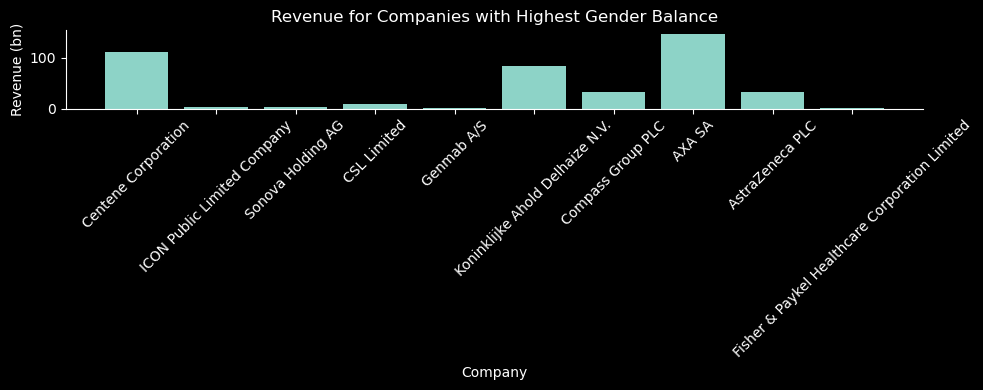

In [832]:
import pandas as pd
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
# df=datasets["Supernova sample dataset"].copy()
df_sorted = df.nlargest(10, 'Gender_balance_pct')
plt.bar(df_sorted['company'], df_sorted['revenue_bn'])
plt.xlabel('Company')
plt.ylabel('Revenue (bn)')
plt.title('Revenue for Companies with Highest Gender Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

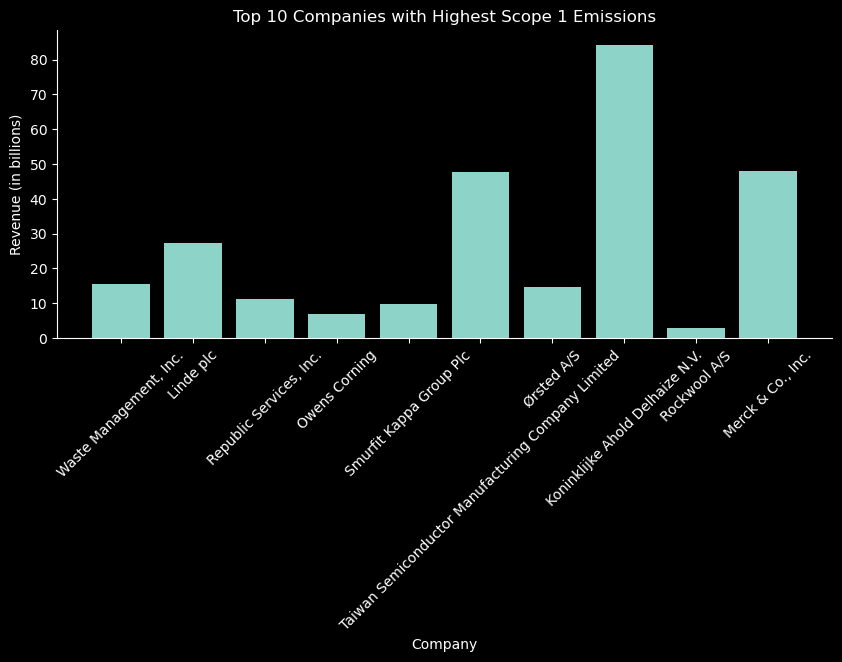

In [834]:
import pandas as pd
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
# df=datasets["Supernova sample dataset"].copy()
df_sorted = df.sort_values('emissions_scope_1', ascending=False)

top_10_companies = df_sorted.head(10)

ax.bar(top_10_companies['company'], top_10_companies['revenue_bn'])
ax.set_xlabel('Company')
ax.set_ylabel('Revenue (in billions)')
ax.set_title('Top 10 Companies with Highest Scope 1 Emissions')

plt.xticks(rotation=45)
plt.show()

In [837]:
ds = [1,[2,5,6]]

a, b = ds
ds

[1, [2, 5, 6]]

In [839]:
dd = [1,5] + [5,4]

dd

[1, 5, 5, 4]

## demo dataset

In [2]:
import pandas as pd

df = pd.read_csv('c:/Users/johan/Documents/GitHub/sandbox/jupyter/data/Demo_Dataset.csv')

df

,Indicator,Category,Company,Frameworks,Value,Attributed,Submitted,Proof
0,Carbon Footprint,Climate,[dropdown],"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",tCO2eq,NaN,90%%,[download]
1,Carbon Footprint,Climate,CarbonZero Tech,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",1523 tons CO2e,152.3 tons CO2e,Submitted,[download]
2,Carbon Footprint,Climate,SolarScape Solutions,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",NaN,NaN,Not sumbitted,NaN
3,Carbon Footprint,Climate,EcoPower Innovations,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",1876 tons CO2e,187.6 tons CO2e,Submitted,[download]
4,Carbon Footprint,Climate,ClimateGuard Technologies,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",2200 tons CO2e,220 tons CO2e,Submitted,[download]
...,...,...,...,...,...,...,...,...
314,Exposure to controversial weapons,Health,GreenGrid Systems,"PAIs, SFDR",NaN,NaN,Submitted,[download]
315,Exposure to controversial weapons,Health,BioFuel Dynamics,"PAIs, SFDR",NaN,NaN,Submitted,[download]
316,Exposure to controversial weapons,Health,ClimateTech Labs,"PAIs, SFDR",NaN,NaN,Submitted,[download]
317,Exposure to controversial weapons,Health,OceanWave Energy,"PAIs, SFDR",NaN,NaN,Submitted,[download]


In [21]:
df_filtered = df[df['Company'] != "[dropdown]"]
df_filtered['Units'] = df_filtered['Value'].str.extract(r'([a-zA-Z]+)')
df_filtered['Value'] = df_filtered['Value'].str.extract(r'([\d.]+)')
df_filtered['Attributed'] = df_filtered['Attributed'].str.extract(r'([\d.]+)')
df_filtered['Value'] = pd.to_numeric(df_filtered['Value'])
df_filtered

C:\Users\johan\AppData\Local\Temp\ipykernel_38372\4096990559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Units'] = df_filtered['Value'].str.extract(r'([a-zA-Z]+)')
C:\Users\johan\AppData\Local\Temp\ipykernel_38372\4096990559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Value'] = df_filtered['Value'].str.extract(r'([\d.]+)')
C:\Users\johan\AppData\Local\Temp\ipykernel_38372\4096990559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Indicator,Category,Company,Frameworks,Value,Attributed,Submitted,Proof,Units
1,Carbon Footprint,Climate,CarbonZero Tech,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",1523.0,152.3,Submitted,[download],tons
2,Carbon Footprint,Climate,SolarScape Solutions,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",NaN,NaN,Not sumbitted,NaN,NaN
3,Carbon Footprint,Climate,EcoPower Innovations,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",1876.0,187.6,Submitted,[download],tons
4,Carbon Footprint,Climate,ClimateGuard Technologies,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",2200.0,220,Submitted,[download],tons
5,Carbon Footprint,Climate,WindFlow Energy,"GHG Protocol, SFDR, PAIs, IRIS+, TCFD",901.0,90.1,Submitted,[download],tons
...,...,...,...,...,...,...,...,...,...
314,Exposure to controversial weapons,Health,GreenGrid Systems,"PAIs, SFDR",NaN,NaN,Submitted,[download],NaN
315,Exposure to controversial weapons,Health,BioFuel Dynamics,"PAIs, SFDR",NaN,NaN,Submitted,[download],NaN
316,Exposure to controversial weapons,Health,ClimateTech Labs,"PAIs, SFDR",NaN,NaN,Submitted,[download],NaN
317,Exposure to controversial weapons,Health,OceanWave Energy,"PAIs, SFDR",NaN,NaN,Submitted,[download],NaN


In [5]:
df_filtered.to_csv('filtered.csv')

In [29]:
# First, let's melt the DataFrame
df_melted = pd.melt(df_filtered, id_vars=['Company', 'Indicator'], value_vars=['Value', 'Attributed', 'Submitted', 'Proof', 'Units'])
df_melted


,Company,Indicator,variable,value
0,CarbonZero Tech,Carbon Footprint,Value,1523.0
1,SolarScape Solutions,Carbon Footprint,Value,NaN
2,EcoPower Innovations,Carbon Footprint,Value,1876.0
3,ClimateGuard Technologies,Carbon Footprint,Value,2200.0
4,WindFlow Energy,Carbon Footprint,Value,901.0
...,...,...,...,...
1445,GreenGrid Systems,Exposure to controversial weapons,Units,NaN
1446,BioFuel Dynamics,Exposure to controversial weapons,Units,NaN
1447,ClimateTech Labs,Exposure to controversial weapons,Units,NaN
1448,OceanWave Energy,Exposure to controversial weapons,Units,NaN


In [82]:
df_pivot_melted = df_filtered.pivot_table(index=['Company'], columns='Indicator', values='Value', aggfunc='first') # , 'Attributed','Submitted', 'Proof', 'Units'
df_pivot_melted

Indicator,Board gender diversity,Carbon Footprint,EU Taxonomy Capex Aligned,EU Taxonomy Capex Eligible,EU Taxonomy Opex Aligned,EU Taxonomy Opex Eligible,EU Taxonomy Revenue Aligned,EU Taxonomy Revenue Eligible,Emissions to water,GHG Emissions Scope 1,GHG Emissions Scope 2,GHG Emissions Scope 3,GHG Intensity,Gender pay gap,Hazardous waste ratio,Non-renewable energy consumption,Non-renewable energy production,Renewable Energy Usage,Waste Diversion Rate
Company,,,,,,,,,,,,,,,,,,,
BioFuel Dynamics,12.0,1249.0,12.0,12.0,29.0,29.0,91.0,91.0,0.0,938.0,5.0,12.0,0.88,19.0,52.3,1785.0,980.0,1.0,75.0
CarbonZero Tech,15.0,1523.0,47.0,47.0,76.0,76.0,42.0,42.0,0.0,542.0,4.0,9.0,0.78,12.0,34.5,1250.0,0.0,658.0,75.0
ClimateGuard Technologies,22.0,2200.0,28.0,28.0,82.0,82.0,63.0,63.0,0.0,829.0,3.0,7.0,1.50,8.0,18.7,2075.0,1680.0,425.0,80.0
ClimateTech Labs,17.0,1700.0,66.0,66.0,94.0,94.0,37.0,37.0,0.0,671.0,3.0,6.0,1.10,10.0,14.6,1100.0,1785.0,398.0,70.0
EcoPower Innovations,18.0,1876.0,83.0,83.0,58.0,58.0,25.0,25.0,0.0,498.0,5.0,11.0,0.95,21.0,45.6,1680.0,0.0,789.0,70.0
GreenGrid Systems,14.0,1433.0,53.0,53.0,67.0,67.0,55.0,55.0,0.0,573.0,4.0,9.0,1.80,14.0,28.1,980.0,1423.0,1.0,60.0
OceanWave Energy,16.0,1600.0,39.0,39.0,50.0,50.0,68.0,68.0,0.0,521.0,4.0,10.0,1.35,28.0,41.9,1567.0,0.0,456.0,80.0
RenewaTech Solutions,13.0,1300.0,88.0,88.0,71.0,71.0,19.0,19.0,0.0,783.0,4.0,8.0,0.72,16.0,31.0,1345.0,0.0,589.0,85.0
SolarScape Solutions,12.0,NaN,60.0,60.0,33.0,33.0,87.0,87.0,0.0,712.0,3.0,8.0,1.25,17.0,22.8,890.0,0.0,512.0,85.0


In [89]:
df_pivot_melted = df_pivot_melted.reset_index(0)
df_pivot_melted.index

RangeIndex(start=0, stop=10, step=1)

In [90]:
df_pivot_melted.head()

Indicator,Company,Board gender diversity,Carbon Footprint,EU Taxonomy Capex Aligned,EU Taxonomy Capex Eligible,EU Taxonomy Opex Aligned,EU Taxonomy Opex Eligible,EU Taxonomy Revenue Aligned,EU Taxonomy Revenue Eligible,Emissions to water,GHG Emissions Scope 1,GHG Emissions Scope 2,GHG Emissions Scope 3,GHG Intensity,Gender pay gap,Hazardous waste ratio,Non-renewable energy consumption,Non-renewable energy production,Renewable Energy Usage,Waste Diversion Rate
0,BioFuel Dynamics,12.0,1249.0,12.0,12.0,29.0,29.0,91.0,91.0,0.0,938.0,5.0,12.0,0.88,19.0,52.3,1785.0,980.0,1.0,75.0
1,CarbonZero Tech,15.0,1523.0,47.0,47.0,76.0,76.0,42.0,42.0,0.0,542.0,4.0,9.0,0.78,12.0,34.5,1250.0,0.0,658.0,75.0
2,ClimateGuard Technologies,22.0,2200.0,28.0,28.0,82.0,82.0,63.0,63.0,0.0,829.0,3.0,7.0,1.50,8.0,18.7,2075.0,1680.0,425.0,80.0
3,ClimateTech Labs,17.0,1700.0,66.0,66.0,94.0,94.0,37.0,37.0,0.0,671.0,3.0,6.0,1.10,10.0,14.6,1100.0,1785.0,398.0,70.0
4,EcoPower Innovations,18.0,1876.0,83.0,83.0,58.0,58.0,25.0,25.0,0.0,498.0,5.0,11.0,0.95,21.0,45.6,1680.0,0.0,789.0,70.0


In [76]:
df_sample_stacked = df_pivot_melted.stack(0)
df_sample_stacked.head(10)

Indicator                   Alignment with OECD and UN Principles  \
Company                                                             
BioFuel Dynamics Attributed                                   NaN   
                 Proof                                 [download]   
                 Submitted                              Submitted   
                 Units                                     Active   
                 Value                                        NaN   
CarbonZero Tech  Attributed                                   NaN   
                 Proof                                 [download]   
                 Submitted                              Submitted   
                 Units                                     Active   
                 Value                                        NaN   

Indicator                   Biodiversity Impact Board gender diversity  \
Company                                                                  
BioFuel Dynamics Attributed                 NaN                    NaN   
                 Proof               [download]             [download]   
                 Submitted            Submitted              Submitted   
                 Units                 Moderate                    NaN   
                 Value                      NaN                   12.0   
CarbonZero Tech  Attributed                 NaN                    NaN   
                 Proof               [download]             [download]   
                 Submitted            Submitted              Submitted   
                 Units                     High                    NaN   
                 Value                      NaN                   15.0   

Indicator                   Carbon Footprint Climate Change Policy  \
Company                                                              
BioFuel Dynamics Attributed            124.9                   NaN   
                 Proof            [download]            [download]   
                 Submitted         Submitted             Submitted   
                 Units                  tons             Ambitious   
                 Value                1249.0                   NaN   
CarbonZero Tech  Attributed            152.3                   NaN   
                 Proof            [download]            [download]   
                 Submitted         Submitted             Submitted   
                 Units                  tons             Ambitious   
                 Value                1523.0                   NaN   

Indicator                   Community Engagement Diversity and Inclusion  \
Company                                                                    
BioFuel Dynamics Attributed                  NaN                     NaN   
                 Proof                [download]              [download]   
                 Submitted             Submitted               Submitted   
                 Units                    Active           Comprehensive   
                 Value                       NaN                     NaN   
CarbonZero Tech  Attributed                  NaN                     NaN   
                 Proof                [download]              [download]   
                 Submitted             Submitted               Submitted   
                 Units                    Active           Comprehensive   
                 Value                       NaN                     NaN   

Indicator                   EU Taxonomy Capex Aligned  \
Company                                                 
BioFuel Dynamics Attributed                       NaN   
                 Proof                     [download]   
                 Submitted                  Submitted   
                 Units                            NaN   
                 Value                           12.0   
CarbonZero Tech  Attributed                       NaN   
                 Proof                     [download]   
               

In [86]:
df_sample_stacked.index

RangeIndex(start=0, stop=50, step=1)

In [77]:
df_sample_stacked = df_sample_stacked.reset_index(names=['Company','Type'])

In [78]:
df_sample_stacked.sample(10)

Indicator,Company,Type,Alignment with OECD and UN Principles,Biodiversity Impact,Board gender diversity,Carbon Footprint,Climate Change Policy,Community Engagement,Diversity and Inclusion,EU Taxonomy Capex Aligned,...,GHG Emissions Scope 3,GHG Intensity,Gender pay gap,Hazardous waste ratio,Impact on high biodiversity areas,Non-renewable energy consumption,Non-renewable energy production,Renewable Energy Usage,Supply Chain Policy,Waste Diversion Rate
29,GreenGrid Systems,Value,NaN,NaN,14.0,1433.0,NaN,NaN,NaN,53.0,...,9.0,1.8,14.0,28.1,NaN,980.0,1423.0,1.0,NaN,60.0
48,WindFlow Energy,Units,Active,High,NaN,tons,Ambitious,Active,Comprehensive,NaN,...,tCO,kg,NaN,tonnes,NaN,KWh,KWh,KWh,Strong,NaN
37,RenewaTech Solutions,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,...,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted,Submitted
26,GreenGrid Systems,Proof,[download],[download],[download],[download],[download],[download],[download],[download],...,[download],[download],[download],[download],[download],[download],[download],[download],[download],[download]
16,ClimateTech Labs,Proof,[download],[download],[download],[download],[download],[download],[download],[download],...,[download],[download],[download],[download],[download],[download],[download],[download],[download],[download]
44,SolarScape Solutions,Value,NaN,NaN,12.0,NaN,NaN,NaN,NaN,60.0,...,8.0,1.25,17.0,22.8,NaN,890.0,0.0,512.0,NaN,85.0
18,ClimateTech Labs,Units,Involved,High,NaN,tons,Aggressive,Involved,Developing,NaN,...,tCO,kg,NaN,tonnes,NaN,KWh,KWh,KWh,Moderate,NaN
14,ClimateGuard Technologies,Value,NaN,NaN,22.0,2200.0,NaN,NaN,NaN,28.0,...,7.0,1.5,8.0,18.7,NaN,2075.0,1680.0,425.0,NaN,80.0
15,ClimateTech Labs,Attributed,NaN,NaN,NaN,170,NaN,NaN,NaN,NaN,...,1116.8,NaN,NaN,0.368,NaN,132,214.2,39,NaN,NaN
20,EcoPower Innovations,Attributed,NaN,NaN,NaN,187.6,NaN,NaN,NaN,NaN,...,1830.4,NaN,NaN,1.46,NaN,201.6,0,78,NaN,NaN


In [73]:
from pymongo import MongoClient
import pandas as pd

uri = os.getenv('MONGO_URI')
client = MongoClient(uri)

# database code goes here
db = client.General

In [92]:
db.demo_dataset.delete_many({})

In [91]:
df_dict = df_pivot_melted.to_dict(orient='records')
df_dict

[{'Company': 'BioFuel Dynamics',
  'Board gender diversity': 12.0,
  'Carbon Footprint': 1249.0,
  'EU Taxonomy Capex Aligned': 12.0,
  'EU Taxonomy Capex Eligible': 12.0,
  'EU Taxonomy Opex Aligned': 29.0,
  'EU Taxonomy Opex Eligible': 29.0,
  'EU Taxonomy Revenue Aligned': 91.0,
  'EU Taxonomy Revenue Eligible': 91.0,
  'Emissions to water': 0.0,
  'GHG Emissions Scope 1': 938.0,
  'GHG Emissions Scope 2': 5.0,
  'GHG Emissions Scope 3': 12.0,
  'GHG Intensity': 0.88,
  'Gender pay gap': 19.0,
  'Hazardous waste ratio': 52.3,
  'Non-renewable energy consumption': 1785.0,
  'Non-renewable energy production': 980.0,
  'Renewable Energy Usage': 1.0,
  'Waste Diversion Rate': 75.0},
 {'Company': 'CarbonZero Tech',
  'Board gender diversity': 15.0,
  'Carbon Footprint': 1523.0,
  'EU Taxonomy Capex Aligned': 47.0,
  'EU Taxonomy Capex Eligible': 47.0,
  'EU Taxonomy Opex Aligned': 76.0,
  'EU Taxonomy Opex Eligible': 76.0,
  'EU Taxonomy Revenue Aligned': 42.0,
  'EU Taxonomy Revenue El

In [93]:
df_dict = df_pivot_melted.to_dict(orient='records')

# careful!
db.demo_dataset.insert_many(df_dict)

db.demo_dataset.find_one()

{'_id': ObjectId('64ef647d3616791bf865eb68'),
 'Company': 'BioFuel Dynamics',
 'Board gender diversity': 12.0,
 'Carbon Footprint': 1249.0,
 'EU Taxonomy Capex Aligned': 12.0,
 'EU Taxonomy Capex Eligible': 12.0,
 'EU Taxonomy Opex Aligned': 29.0,
 'EU Taxonomy Opex Eligible': 29.0,
 'EU Taxonomy Revenue Aligned': 91.0,
 'EU Taxonomy Revenue Eligible': 91.0,
 'Emissions to water': 0.0,
 'GHG Emissions Scope 1': 938.0,
 'GHG Emissions Scope 2': 5.0,
 'GHG Emissions Scope 3': 12.0,
 'GHG Intensity': 0.88,
 'Gender pay gap': 19.0,
 'Hazardous waste ratio': 52.3,
 'Non-renewable energy consumption': 1785.0,
 'Non-renewable energy production': 980.0,
 'Renewable Energy Usage': 1.0,
 'Waste Diversion Rate': 75.0}

In [94]:
import pandas as pd

df = pd.read_csv('c:/Users/johan/Documents/GitHub/sandbox/jupyter/data/Fin_RI Report.csv')

df.head()

,Project,Metric,2018,2019,2020,2021,2022,LTD
0,Africa Hydro Holdco Limited,Annual Avoided GHG Emissions (tCO2eq/year),0,"23,533","43,443","31,369","52,361","150,706"
1,Ampyr,Annual Avoided GHG Emissions (tCO2eq/year),0,0,0,"86,566","98,891","185,457"
2,Cleantech Solar Asia Pte Ltd,Annual Avoided GHG Emissions (tCO2eq/year),"17,417","106,830","185,327","334,764","501,790","1,146,128"
3,Ecotech TraVinh Renewable JSC,Annual Avoided GHG Emissions (tCO2eq/year),0,0,0,0,"2,663","2,663"
4,Green Roof (previously Shire Oak),Annual Avoided GHG Emissions (tCO2eq/year),0,0,0,0,"1,870","1,870"


In [2]:
df.columns

Index(['Project', 'Metric', '2018', '2019', '2020', '2021', '2022', 'LTD'], dtype='object')

In [95]:
df[['2018', '2019', '2020', '2021', '2022', 'LTD']] = df[['2018', '2019', '2020', '2021', '2022', 'LTD']].apply(lambda x: x.str.replace(',', '')).astype('float64')

df.head()

,Project,Metric,2018,2019,2020,2021,2022,LTD
0,Africa Hydro Holdco Limited,Annual Avoided GHG Emissions (tCO2eq/year),0.0,23533.0,43443.0,31369.0,52361.0,150706.0
1,Ampyr,Annual Avoided GHG Emissions (tCO2eq/year),0.0,0.0,0.0,86566.0,98891.0,185457.0
2,Cleantech Solar Asia Pte Ltd,Annual Avoided GHG Emissions (tCO2eq/year),17417.0,106830.0,185327.0,334764.0,501790.0,1146128.0
3,Ecotech TraVinh Renewable JSC,Annual Avoided GHG Emissions (tCO2eq/year),0.0,0.0,0.0,0.0,2663.0,2663.0
4,Green Roof (previously Shire Oak),Annual Avoided GHG Emissions (tCO2eq/year),0.0,0.0,0.0,0.0,1870.0,1870.0


In [96]:
df.columns

Index(['Project', 'Metric', '2018', '2019', '2020', '2021', '2022', 'LTD'], dtype='object')

In [103]:
df_melted = pd.melt(df, id_vars=['Project', 'Metric'], value_vars=['2020', '2021', '2022', 'LTD'], var_name='Year', value_name='Value')
df_melted

,Project,Metric,Year,Value
0,Africa Hydro Holdco Limited,Annual Avoided GHG Emissions (tCO2eq/year),2020,43443.0
1,Ampyr,Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
2,Cleantech Solar Asia Pte Ltd,Annual Avoided GHG Emissions (tCO2eq/year),2020,185327.0
3,Ecotech TraVinh Renewable JSC,Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
4,Green Roof (previously Shire Oak),Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
...,...,...,...,...
175,Green Roof (previously Shire Oak),Total number of jobs created during reporting ...,LTD,175.0
176,Red Sea Power Limited SAS,Total number of jobs created during reporting ...,LTD,302.0
177,Tra Vinh Wind Power Co. Ltd No. 1 JSC,Total number of jobs created during reporting ...,LTD,3182.0
178,Bio2Watt,Total number of jobs created during reporting ...,LTD,65.0


In [105]:
df_melted = df_melted[df_melted['Project'] != "Empower"]
df_melted

,Project,Metric,Year,Value
0,Africa Hydro Holdco Limited,Annual Avoided GHG Emissions (tCO2eq/year),2020,43443.0
1,Ampyr,Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
2,Cleantech Solar Asia Pte Ltd,Annual Avoided GHG Emissions (tCO2eq/year),2020,185327.0
3,Ecotech TraVinh Renewable JSC,Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
4,Green Roof (previously Shire Oak),Annual Avoided GHG Emissions (tCO2eq/year),2020,0.0
...,...,...,...,...
174,Ecotech TraVinh Renewable JSC,Total number of jobs created during reporting ...,LTD,276.0
175,Green Roof (previously Shire Oak),Total number of jobs created during reporting ...,LTD,175.0
176,Red Sea Power Limited SAS,Total number of jobs created during reporting ...,LTD,302.0
177,Tra Vinh Wind Power Co. Ltd No. 1 JSC,Total number of jobs created during reporting ...,LTD,3182.0


In [106]:
df_pivot = pd.pivot_table(df_melted, columns='Metric', index=['Project', 'Year'], values='Value', aggfunc='mean')

df_pivot_reset = df_pivot.reset_index()
df_pivot_reset

Metric,Project,Year,Annual Avoided GHG Emissions (tCO2eq/year),Newly Installed renewable energy capacity (MW),Total number of jobs created during reporting period,Total number of people with improved access to renewable energy,Total renewable power production (GWh per year)
0,Africa Hydro Holdco Limited,2020,43443.0,0.0,1170.0,926226.0,310.7
1,Africa Hydro Holdco Limited,2021,31369.0,58.0,281.0,668819.0,224.5
2,Africa Hydro Holdco Limited,2022,52361.0,0.0,101.0,1116288.0,374.8
3,Africa Hydro Holdco Limited,LTD,150706.0,112.0,1170.0,1116288.0,1079.0
4,Ampyr,2020,0.0,0.0,87.0,0.0,0.0
5,Ampyr,2021,86566.0,38.0,49.0,96907.0,98.6
6,Ampyr,2022,98891.0,0.0,54.0,110704.0,112.7
7,Ampyr,LTD,185457.0,38.0,87.0,110704.0,211.3
8,Bio2Wat,2020,0.0,NaN,NaN,0.0,NaN
9,Bio2Wat,2021,0.0,NaN,NaN,0.0,NaN


In [99]:
df_pivot_reset.columns

Index(['Project', 'Year', 'Annual Avoided GHG Emissions (tCO2eq/year)',
       'Newly Installed renewable energy capacity (MW)',
       'Total number of jobs created during reporting period',
       'Total number of people with improved access to renewable energy',
       'Total renewable power production (GWh per year)'],
      dtype='object', name='Metric')

In [107]:
import numpy as np
df_pivot_reset.replace(0, np.nan, inplace=True)
df_pivot_reset

Metric,Project,Year,Annual Avoided GHG Emissions (tCO2eq/year),Newly Installed renewable energy capacity (MW),Total number of jobs created during reporting period,Total number of people with improved access to renewable energy,Total renewable power production (GWh per year)
0,Africa Hydro Holdco Limited,2020,43443.0,NaN,1170.0,926226.0,310.7
1,Africa Hydro Holdco Limited,2021,31369.0,58.0,281.0,668819.0,224.5
2,Africa Hydro Holdco Limited,2022,52361.0,NaN,101.0,1116288.0,374.8
3,Africa Hydro Holdco Limited,LTD,150706.0,112.0,1170.0,1116288.0,1079.0
4,Ampyr,2020,NaN,NaN,87.0,NaN,NaN
5,Ampyr,2021,86566.0,38.0,49.0,96907.0,98.6
6,Ampyr,2022,98891.0,NaN,54.0,110704.0,112.7
7,Ampyr,LTD,185457.0,38.0,87.0,110704.0,211.3
8,Bio2Wat,2020,NaN,NaN,NaN,NaN,NaN
9,Bio2Wat,2021,NaN,NaN,NaN,NaN,NaN


In [108]:
db.CLM_demo_dataset.delete_many({})

In [109]:
from pymongo import MongoClient
import pandas as pd

uri = os.getenv('MONGO_URI')

client = MongoClient(uri)

# database code goes here
db = client.General

df_dict = df_pivot_reset.to_dict(orient='records')

# careful!
db.CLM_demo_dataset.insert_many(df_dict)

db.CLM_demo_dataset.find_one()

{'_id': ObjectId('64ef66b43616791bf865ebb0'),
 'Project': 'Africa Hydro Holdco Limited',
 'Year': '2020',
 'Annual Avoided GHG Emissions (tCO2eq/year)': 43443.0,
 'Newly Installed renewable energy capacity (MW)': nan,
 'Total number of jobs created during reporting period': 1170.0,
 'Total number of people with improved access to renewable energy': 926226.0,
 'Total renewable power production (GWh per year)': 310.7}